### Installation des dépendances

In [20]:
%pip install numpy
%pip install opencv-python
%pip install -U matplotlib
import numpy as np
import cv2 as cv
import matplotlib.pyplot as py
from numpy import linalg as LA
import os
import time

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\loicn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\loicn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\loicn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Transformée de KL

### Lecture des fichiers images

In [17]:
def plotImage(image, type):
    figure = py.figure(figsize = (10,10))
    imageout = np.clip(image,0,255)
    imageout= imageout.astype(type)
    py.imshow(imageout, cmap='gray')
    py.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1000x1000 with 0 Axes>

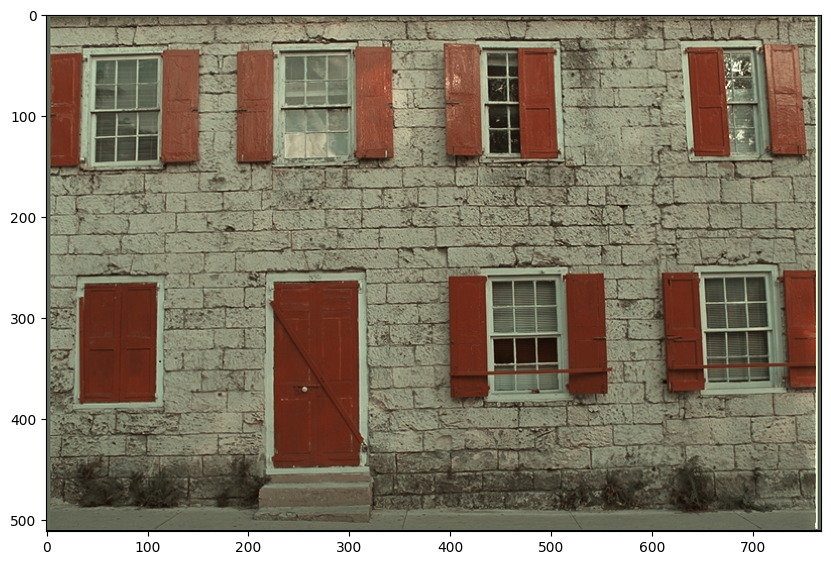

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1000x1000 with 0 Axes>

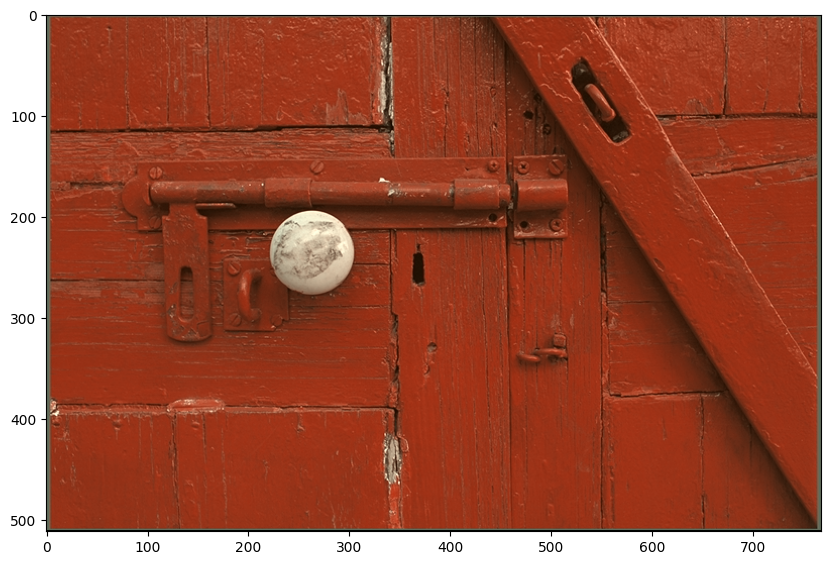

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1000x1000 with 0 Axes>

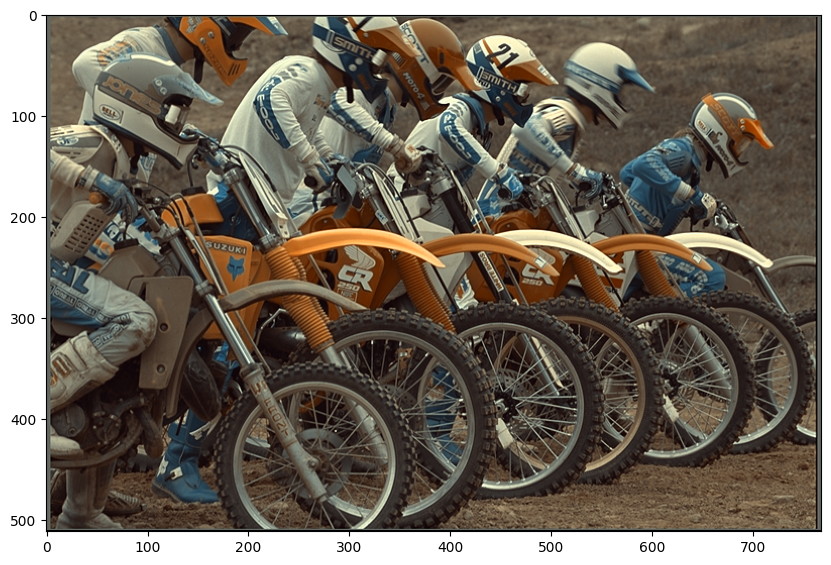

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1000x1000 with 0 Axes>

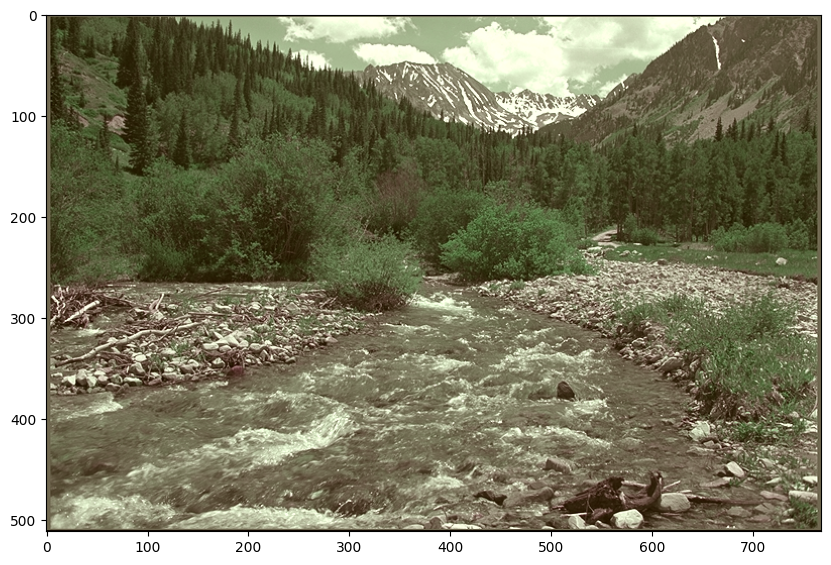

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1000x1000 with 0 Axes>

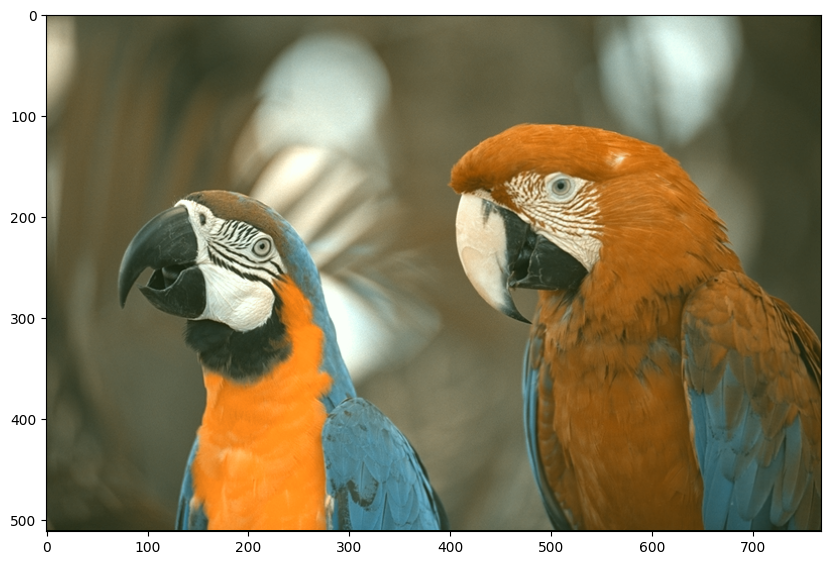

In [19]:
# Read image
dataPath = "/data/"
currDirectory = os.getcwd()
fileList = os.listdir(currDirectory + dataPath)

for file in fileList:
    imagePath = currDirectory + dataPath + file
    fig1 = py.figure(figsize = (10,10))
    img = py.imread(imagePath)
    
    if img is not None:
        t1, t2, t3 = transformeeKL(img)
        plotImage(t3, 'double')
    
   

### Implémentation de la transformée de KL 

In [15]:
def transformeeKL(image):
    # Calcul de la moyenne
    sommeR = 0.0 
    sommeG = 0.0 
    sommeB = 0.0 
    for i in range(len(image)):
        for j in range(len(image[0])):
            sommeR=sommeR+image[i][j][0]
            sommeG=sommeG+image[i][j][1]
            sommeB=sommeB+image[i][j][2]
    nbPixels = len(image)*len(image[0])        
    MoyR= sommeR / nbPixels
    MoyG= sommeG / nbPixels
    MoyB= sommeB / nbPixels
    
    # calcul de la matrice de covariance
    covRGB = np.zeros((3,3), dtype = "double")
    for i in range(len(image)):
        for j in range(len(image[0])):
            vecTemp=[[image[i][j][0] - MoyR], [image[i][j][1]] - MoyG, [image[i][j][2] - MoyB]]
            vecProdTemp = np.dot(vecTemp,np.transpose(vecTemp))
            covRGB = np.add(covRGB,vecProdTemp)
    covRGB = covRGB / nbPixels  
    
    # Calcul des valeurs propres et vecteurs propres
    eigval, eigvec = LA.eig(covRGB)
    eigvec = np.transpose(eigvec)
    
    # retirer les axes principaux
    eigvecsansAxe0 = np.copy(eigvec)
    eigvecsansAxe0[0,:] = [0.0,0.0,0.0]
    eigvecsansAxe1 = np.copy(eigvec)
    eigvecsansAxe1[1,:] = [0.0,0.0,0.0]
    eigvecsansAxe2 = np.copy(eigvec)
    eigvecsansAxe2[2,:] = [0.0,0.0,0.0]

    imageKLsansAxe0 = np.copy(image)
    imageKLsansAxe1 = np.copy(image)
    imageKLsansAxe2 = np.copy(image)

    vecMoy =[[MoyR], [MoyG], [MoyB]] 

    for i in range(len(image)):
        for j in range(len(image[0])):
            vecTemp=[[image[i][j][0]], [image[i][j][1]], [image[i][j][2]]]
            #a=Mb
            imageKLsansAxe0[i][j][:] = np.reshape(np.dot(eigvecsansAxe0,np.subtract(vecTemp,vecMoy)),(3))
            imageKLsansAxe1[i][j][:] = np.reshape(np.dot(eigvecsansAxe1,np.subtract(vecTemp,vecMoy)),(3))
            imageKLsansAxe2[i][j][:] = np.reshape(np.dot(eigvecsansAxe2,np.subtract(vecTemp,vecMoy)),(3)) 
            
    invEigvecsansAxe0 = LA.pinv(eigvecsansAxe0)
    invEigvecsansAxe1 = LA.pinv(eigvecsansAxe1)
    invEigvecsansAxe2 = LA.pinv(eigvecsansAxe2)

    vecMoy =[MoyR, MoyG, MoyB] 
    imageRGBsansAxe0 = np.copy(image)
    imageRGBsansAxe1 = np.copy(image)
    imageRGBsansAxe2 = np.copy(image)

    for i in range(len(image)):
        for j in range(len(image[0])):
            #b=inv(M)a
            vecTempsansAxe0=[[imageKLsansAxe0[i][j][0]], [imageKLsansAxe0[i][j][1]], [imageKLsansAxe0[i][j][2]]]
            vecTempsansAxe1=[[imageKLsansAxe1[i][j][0]], [imageKLsansAxe1[i][j][1]], [imageKLsansAxe1[i][j][2]]]
            vecTempsansAxe2=[[imageKLsansAxe2[i][j][0]], [imageKLsansAxe2[i][j][1]], [imageKLsansAxe2[i][j][2]]]     
            imageRGBsansAxe0[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe0,vecTempsansAxe0),(3)),vecMoy)
            imageRGBsansAxe1[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe1,vecTempsansAxe1),(3)),vecMoy)
            imageRGBsansAxe2[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe2,vecTempsansAxe2),(3)),vecMoy)

    return imageRGBsansAxe0, imageRGBsansAxe1, imageRGBsansAxe2  

### Quantification

In [96]:
def quantify(image, quantificateur):
    # Quantification
    for i in range(len(image)):
        for j in range(len(image[0])):
            for k in range(3):
                image[i][j][k] = int(image[i][j][k] / 32) * 32
    return image


### YUV Transformée

In [ ]:
def yuvtransform(image):
    # Transformation YUV
    return cv.cvtColor(img, cv.COLOR_BGR2YUV) # Conversion des images en YUV